In [ ]:
import numpy as np
import pandas as  pd
import matplotlib.pyplot as plt

In [ ]:
# import pandas as pd
# import numpy as np
# import tensorflow
# import keras
# from keras.models import Sequential
# from keras.layers.core import Flatten, Dense, Dropout
# from keras.layers.convolutional import Convolution2D, MaxPooling2D, ZeroPadding2D
# from keras.optimizers import SGD
# import cv2

In [ ]:
import keras
from keras import regularizers
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D
from keras.preprocessing.image import ImageDataGenerator
from keras import backend as K
import numpy as np

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd '/content/drive/MyDrive/assign1_NNFL'

/content/drive/MyDrive/assign1_NNFL


In [ ]:
dataset = pd.read_csv('train.csv')

In [ ]:
# X_train = []
# y_train = []
# X_test = []
# y_test = []
# for index, row in emotion_data.iterrows():
#     k = row['pixels'].split(" ")
#     if row['Usage'] == 'Training':
#         X_train.append(np.array(k))
#         y_train.append(row['emotion'])
#     elif row['Usage'] == 'PublicTest':
#         X_test.append(np.array(k))
#         y_test.append(row['emotion'])

In [ ]:
#label
y = dataset.iloc[:,0].values
# print(y)

In [ ]:
print(len(y))

34887


In [ ]:
x_str = dataset.iloc[:,1]

In [ ]:
a = list(map(int, x_str[0].split(' ')))[:48 * 48]
i = np.array(a).reshape((48, 48)).astype('uint8')

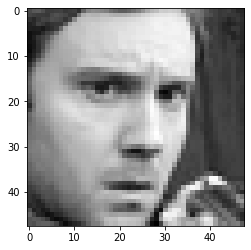

In [ ]:
plt.imshow(i,cmap='gray')

In [ ]:
x = []
for i in range(len(y)):
    a = list(map(int, x_str[i].split(' ')))[:48 * 48]
    img = np.array(a).reshape((48, 48)).astype('uint8')
    # img = img.flatten()
    x.append(img)

In [ ]:
y = np.asarray(y)
x = np.asarray(x)
x = x.astype('float32')
x /= 255


In [ ]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25, random_state = 1)

In [ ]:

x_train = x_train.reshape(x_train.shape[0], 48, 48, 1)
x_test = x_test.reshape(x_test.shape[0], 48, 48, 1)

In [ ]:
#Convert labels to one-hot
num_classes = 7
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
#Model1

###########################

model = Sequential()

model.add(Conv2D(64, kernel_size=(3, 3),activation='relu', input_shape=(48,48,1)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Conv2D(64, (3, 3), activation='relu'))
#model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3),activation='relu'))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(ZeroPadding2D((1,1)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(Dropout(0.4))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3),activation='relu'))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(256, (3, 3), activation='relu'))
# #model.add(Dropout(0.4))
# model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3),activation='relu'))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Conv2D(512, (3, 3), activation='relu'))
# #model.add(Dropout(0.4))
# #model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
model.add(Dropout(0.2))
# model.add(Dense(1024, activation='relu',kernel_regularizer=regularizers.l1_l2(l1=1e-5, l2=1e-4)))
# model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.SGD(),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_15 (Conv2D)           (None, 46, 46, 64)        640       
_________________________________________________________________
conv2d_16 (Conv2D)           (None, 44, 44, 64)        36928     
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 42, 42, 64)        36928     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 21, 21, 64)        0         
_________________________________________________________________
zero_padding2d_6 (ZeroPaddin (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 21, 21, 128)       73856     
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 19, 19, 128)      

In [ ]:
#model2

# model = Sequential()
# model.add(ZeroPadding2D((1,1),input_shape=(48,48,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(64, 3, 3, activation='relu'))
# model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(128, 3, 3, activation='relu'))
# #model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(256, 3, 3, activation='relu'))
# #model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# #model.add(MaxPooling2D((2,2), strides=(2,2)))


# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# model.add(ZeroPadding2D((1,1)))
# model.add(Convolution2D(512, 3, 3, activation='relu'))
# #model.add(MaxPooling2D((2,2), strides=(2,2)))

# model.add(Flatten())
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(4096, activation='relu'))
# model.add(Dropout(0.5))
# model.add(Dense(num_classes, activation='softmax'))

# model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])

# model.summary()

In [ ]:
model.fit(x_train, y_train,
          batch_size=32,
          epochs=100,
          verbose=1,
          validation_data=(x_test, y_test)
          )

Epoch 1/100
818/818 [==============================] - 20s 23ms/step - loss: 3.2290 - accuracy: 0.2520 - val_loss: 3.1912 - val_accuracy: 0.2459
Epoch 2/100
818/818 [==============================] - 19s 23ms/step - loss: 3.1365 - accuracy: 0.2848 - val_loss: 3.1067 - val_accuracy: 0.3082
Epoch 3/100
818/818 [==============================] - 19s 23ms/step - loss: 3.0459 - accuracy: 0.3435 - val_loss: 2.9983 - val_accuracy: 0.3628
Epoch 4/100
818/818 [==============================] - 18s 23ms/step - loss: 2.9599 - accuracy: 0.3807 - val_loss: 2.9536 - val_accuracy: 0.3882
Epoch 5/100
818/818 [==============================] - 18s 23ms/step - loss: 2.8748 - accuracy: 0.4151 - val_loss: 2.8639 - val_accuracy: 0.4197
Epoch 6/100
818/818 [==============================] - 19s 23ms/step - loss: 2.8122 - accuracy: 0.4364 - val_loss: 2.8293 - val_accuracy: 0.4333
Epoch 7/100
818/818 [==============================] - 19s 23ms/step - loss: 2.7401 - accuracy: 0.4593 - val_loss: 2.7843 - val_ac